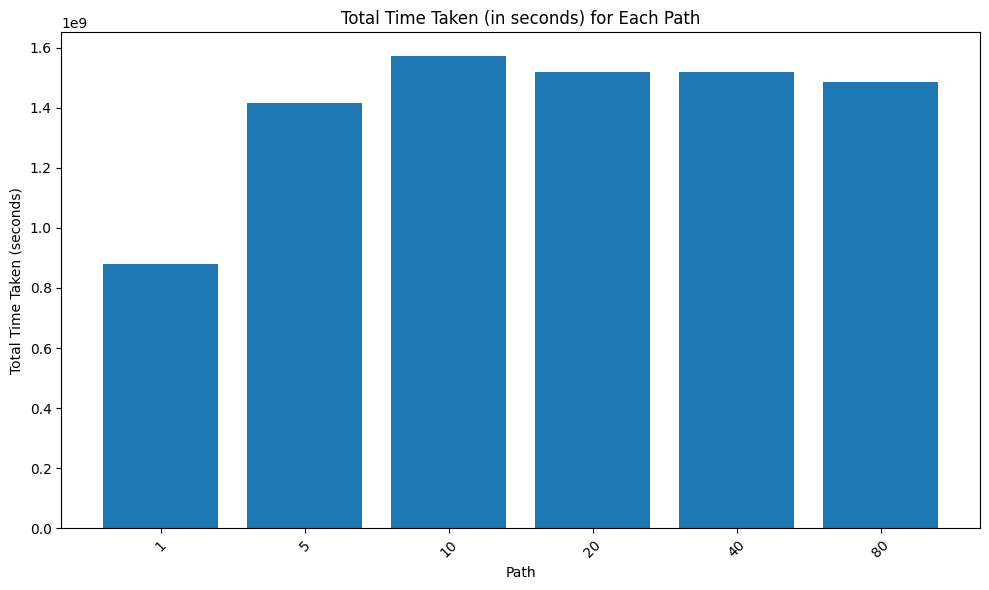

In [37]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# List of paths
paths = [
    '../samples/tcp/data1',
    '../samples/tcp/data5',
    '../samples/tcp/data10',
    '../samples/tcp/data20',
    '../samples/tcp/data40',
    '../samples/tcp/data80'
]

pathsLabels = [
    '1',
    '5',
    '10',
    '20',
    '40',
    '80'
]

total_times = []

for path in paths:
    # Get a list of all csv files in the specified directory
    files = [f for f in os.listdir(path) if f.endswith('.csv')]

    # Read the csv files and store them in a list of dataframes
    dataframes = [pd.read_csv(os.path.join(path, f)) for f in files]

    # Ensure all dataframes have the same number of rows
    assert all(df.shape[0] == dataframes[0].shape[0] for df in dataframes), "Not all CSVs have the same number of rows"

    # Concatenate all dataframes vertically
    df_concatenated = pd.concat(dataframes)

    # Convert the timeTaken to seconds (assuming it's currently in nanoseconds)
    df_concatenated['timeTaken'] = df_concatenated['timeTaken']

    # Group by the index (which is the same across all original dataframes) and compute mean
    df_mean = df_concatenated.groupby(df_concatenated.index).mean()

    # Extract the folder name from the path
    folder_name = os.path.basename(os.path.normpath(path))

    # Write to new CSV without index
    df_mean.to_csv(f'./average_times_{folder_name}.csv', index=False)

    # Compute the sum of timeTaken and add it to the list
    total_times.append(df_mean['timeTaken'].sum())

# Plot the total time taken for each path
plt.figure(figsize=(10,6))
plt.bar(pathsLabels, total_times)
plt.title('Total Time Taken (in seconds) for Each Path')
plt.xlabel('Path')
plt.ylabel('Total Time Taken (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
